**Full ML Pipeline for Bike Demand Forecasting**

**Dataset columns:-**
datetime
season
weather
temp
humidity
windspeed
casual
registered
count

**Load Libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning-1/Ola Bike Ride Forecast Request/Ola Bike Ride Forecast Request.csv")

In [4]:
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,3,2,6.66,76.62,9.57,5,128,133
1,1/1/2011 1:00,4,3,13.54,55.91,4.01,36,184,220
2,1/1/2011 2:00,1,3,29.58,20.97,33.61,34,97,131
3,1/1/2011 3:00,3,1,7.40,61.64,15.85,6,47,53
4,1/1/2011 4:00,3,4,30.66,98.71,11.47,14,199,213


### Initial Inspection of DataFrame(df)

In [5]:
print(f"Shape of the DataFrame: {df.shape}")

Shape of the DataFrame: (10886, 9)


In [6]:
print("\nInformation about the DataFrame:\n")
df.info()


Information about the DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   weather     10886 non-null  int64  
 3   temp        10886 non-null  float64
 4   humidity    10886 non-null  float64
 5   windspeed   10886 non-null  float64
 6   casual      10886 non-null  int64  
 7   registered  10886 non-null  int64  
 8   count       10886 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 765.6+ KB


In [7]:
print("\nDescriptive statistics of the DataFrame:\n")
display(df.describe())


Descriptive statistics of the DataFrame:



,season,weather,temp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.493937,2.491916,20.137973,59.946072,24.960981,24.517545,99.551442,124.068988
std,1.120531,1.123139,8.696625,22.987200,14.424684,14.390014,57.541131,59.449265
min,1.000000,1.000000,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,12.630000,40.040000,12.522500,12.000000,50.000000,74.000000
50%,2.000000,2.000000,20.190000,59.970000,25.000000,25.000000,100.000000,124.000000
75%,3.000000,4.000000,27.707500,79.620000,37.427500,37.000000,149.000000,174.000000
max,4.000000,4.000000,35.000000,99.980000,49.990000,49.000000,199.000000,248.000000


In [8]:
df.isnull().sum()

,0
datetime,0
season,0
weather,0
temp,0
humidity,0
windspeed,0
casual,0
registered,0
count,0


**Purpose:**
Understand data types, value ranges and missing values.

# **Data Cleaning**

In [9]:
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")

In [10]:
df = df.dropna(subset=["datetime"])

In [11]:
df = df.drop_duplicates()

In [12]:
print("Missing Values Before Cleaning:\n", df.isnull().sum())

Missing Values Before Cleaning:
 datetime      0
season        0
weather       0
temp          0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [13]:
numeric_cols = ["temp", "humidity", "windspeed", "casual", "registered", "count"]

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [14]:
cat_cols = ["season", "weather"]

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [15]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

In [16]:
df = df.reset_index(drop=True)


print("Missing Values After Cleaning:\n", df.isnull().sum())
df.head()

Missing Values After Cleaning:
 datetime      0
season        0
weather       0
temp          0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


,datetime,season,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213


**Full Feature Engineering**

In [17]:
df["hour"] = df["datetime"].dt.hour
df["day"] = df["datetime"].dt.day
df["month"] = df["datetime"].dt.month
df["year"] = df["datetime"].dt.year
df["weekday"] = df["datetime"].dt.weekday
df["is_weekend"] = df["weekday"].isin([5,6]).astype(int)

In [18]:
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,hour,day,month,year,weekday,is_weekend
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,0,1,1,2011,5,1
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,1,1,1,2011,5,1
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2,1,1,2011,5,1
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,3,1,1,2011,5,1
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,4,1,1,2011,5,1


In [19]:
df["temp_humidity"] = df["temp"] * df["humidity"]
df["temp_windspeed"] = df["temp"] * df["windspeed"]

In [20]:
df["total_riders"] = df["casual"] + df["registered"]

In [21]:
df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)

df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12)

df["weekday_sin"] = np.sin(2 * np.pi * df["weekday"] / 7)
df["weekday_cos"] = np.cos(2 * np.pi * df["weekday"] / 7)

In [22]:
df = df.drop(columns=["datetime"], errors='ignore')

In [23]:
df.head()

,season,weather,temp,humidity,windspeed,casual,registered,count,hour,day,...,is_weekend,temp_humidity,temp_windspeed,total_riders,hour_sin,hour_cos,month_sin,month_cos,weekday_sin,weekday_cos
0,3,2,6.66,76.62,9.57,5,128,133,0,1,...,1,510.2892,63.7362,133,0.000000,1.000000,0.5,0.866025,-0.974928,-0.222521
1,4,3,13.54,55.91,4.01,36,184,220,1,1,...,1,757.0214,54.2954,220,0.258819,0.965926,0.5,0.866025,-0.974928,-0.222521
2,1,3,29.58,20.97,33.61,34,97,131,2,1,...,1,620.2926,994.1838,131,0.500000,0.866025,0.5,0.866025,-0.974928,-0.222521
3,3,1,7.40,61.64,15.85,6,47,53,3,1,...,1,456.1360,117.2900,53,0.707107,0.707107,0.5,0.866025,-0.974928,-0.222521
4,3,4,30.66,98.71,11.47,14,199,213,4,1,...,1,3026.4486,351.6702,213,0.866025,0.500000,0.5,0.866025,-0.974928,-0.222521


**Exploratory Data Analysis (EDA)**

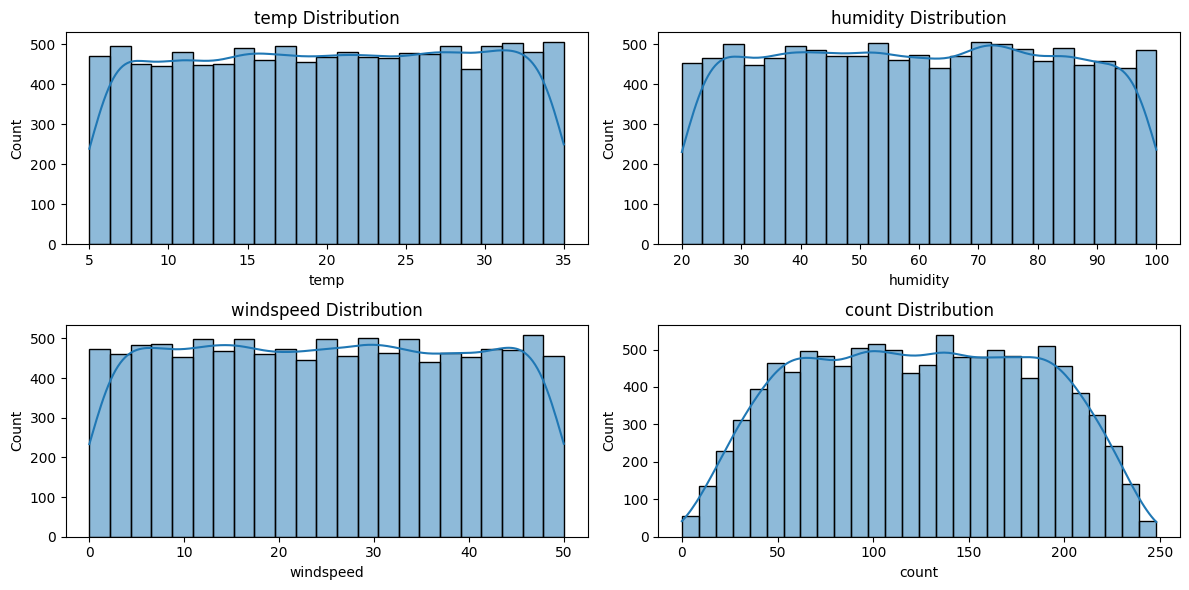

In [24]:
cols = ["temp", "humidity", "windspeed", "count"]

plt.figure(figsize=(12,6))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()


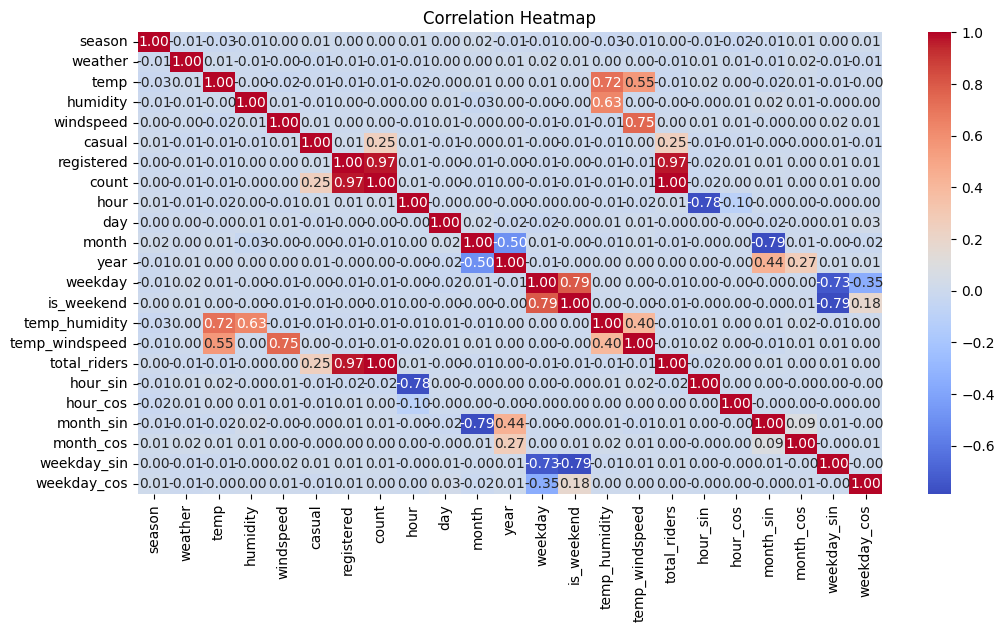

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


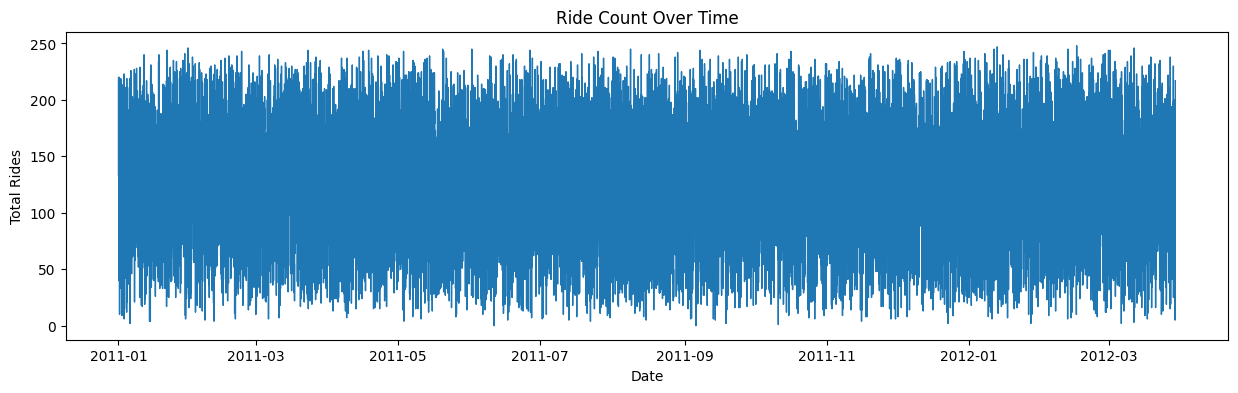

In [26]:
import pandas as pd

# Temporarily load the original dataframe to get the datetime column for plotting
# This assumes the original file path is consistent.
original_df_for_plot = pd.read_csv("/content/drive/MyDrive/Machine Learning-1/Ola Bike Ride Forecast Request/Ola Bike Ride Forecast Request.csv")
original_df_for_plot["datetime"] = pd.to_datetime(original_df_for_plot["datetime"], errors="coerce")

plt.figure(figsize=(15,4))
plt.plot(original_df_for_plot["datetime"], df["count"], linewidth=1)
plt.title("Ride Count Over Time")
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.show()

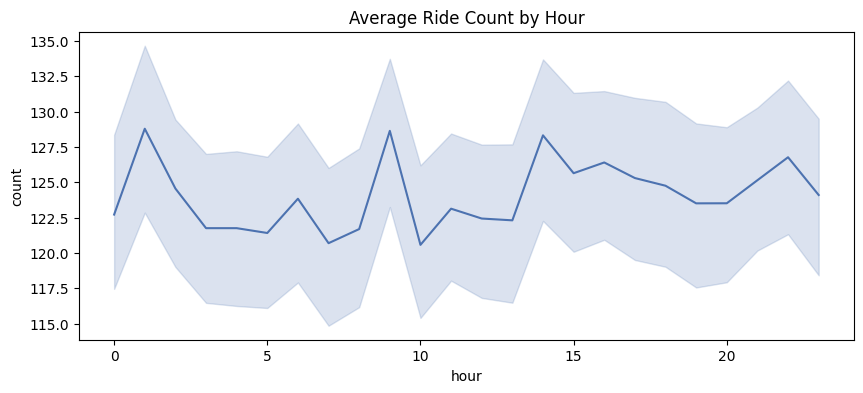

In [27]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x="hour", y="count", color="#4C72B0")
plt.title("Average Ride Count by Hour")
plt.show()

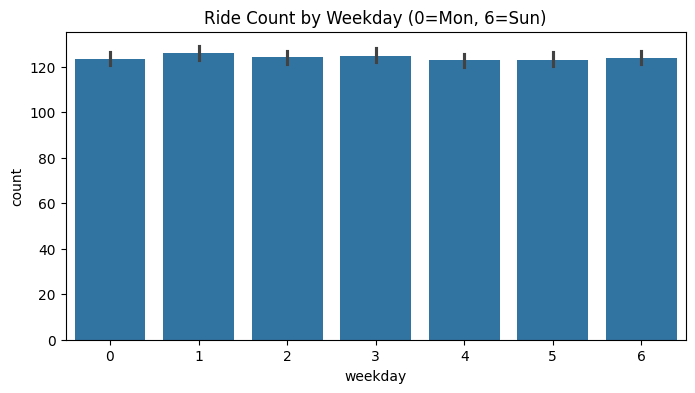

In [28]:
plt.figure(figsize=(8,4))
sns.barplot(x="weekday", y="count", data=df)
plt.title("Ride Count by Weekday (0=Mon, 6=Sun)")
plt.show()

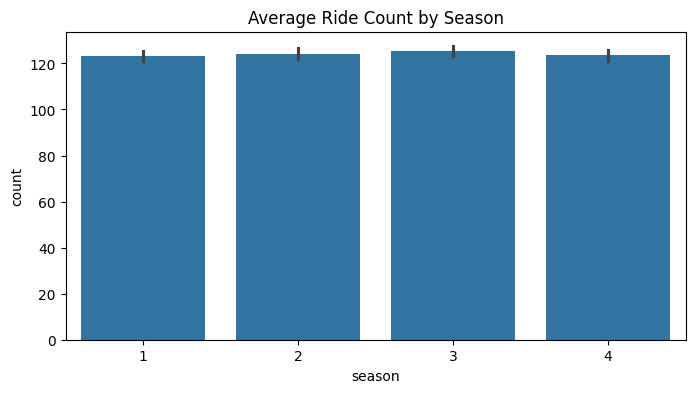

In [29]:
plt.figure(figsize=(8,4))
sns.barplot(x="season", y="count", data=df, estimator=np.mean)
plt.title("Average Ride Count by Season")
plt.show()

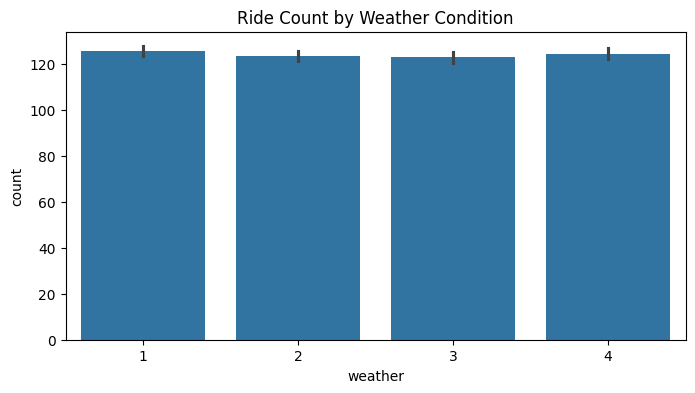

In [30]:
plt.figure(figsize=(8,4))
sns.barplot(x="weather", y="count", data=df, estimator=np.mean)
plt.title("Ride Count by Weather Condition")
plt.show()


/tmp/ipython-input-3963730590.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


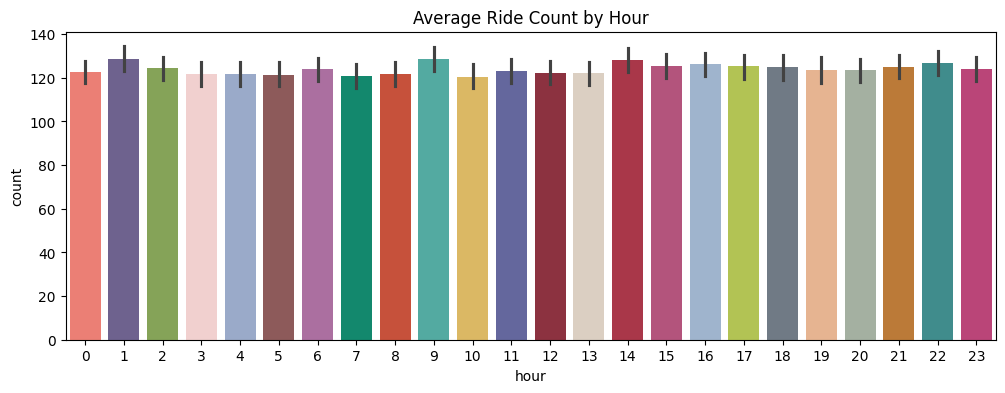

In [31]:
custom_colors = [
    "#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1",
    "#955251", "#B565A7", "#009B77", "#DD4124", "#45B8AC",
    "#EFC050", "#5B5EA6", "#9B2335", "#DFCFBE", "#BC243C",
    "#C3447A", "#98B4D4", "#BFD641", "#6C7A89", "#F4B183",
    "#A2B29F", "#D17A22", "#339999", "#CE3175"
]

plt.figure(figsize=(12,4))
sns.barplot(
    x="hour",
    y="count",
    data=df,
    estimator=np.mean,
    palette=custom_colors[:df["hour"].nunique()]
)
plt.title("Average Ride Count by Hour")
plt.show()

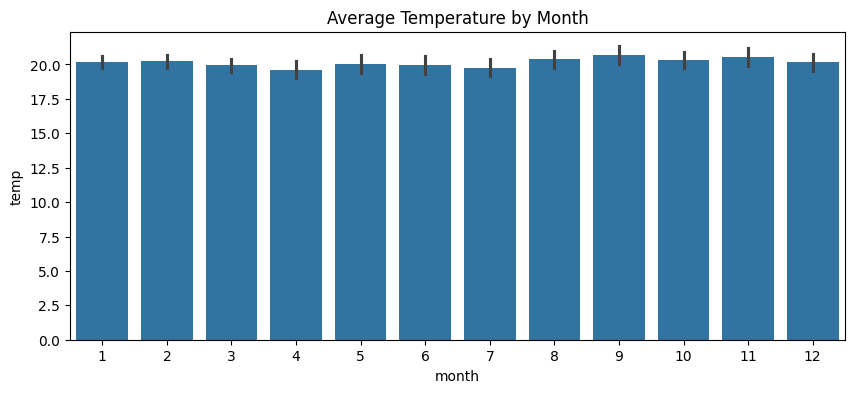

In [32]:
plt.figure(figsize=(10,4))
sns.barplot(x="month", y="temp", data=df, estimator=np.mean)
plt.title("Average Temperature by Month")
plt.show()

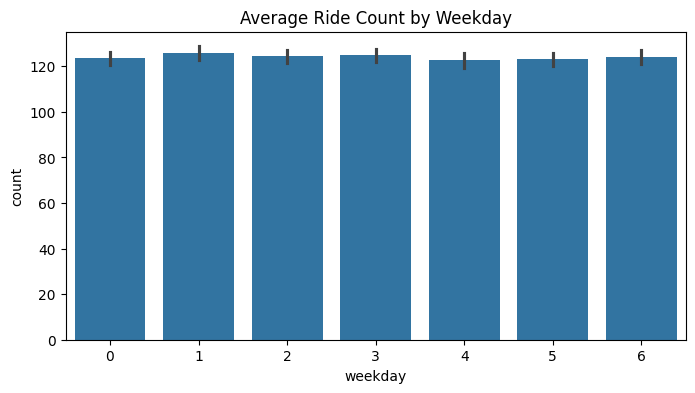

In [33]:


plt.figure(figsize=(8,4))
sns.barplot(x="weekday", y="count", data=df, estimator=np.mean)
plt.title("Average Ride Count by Weekday")
plt.show()


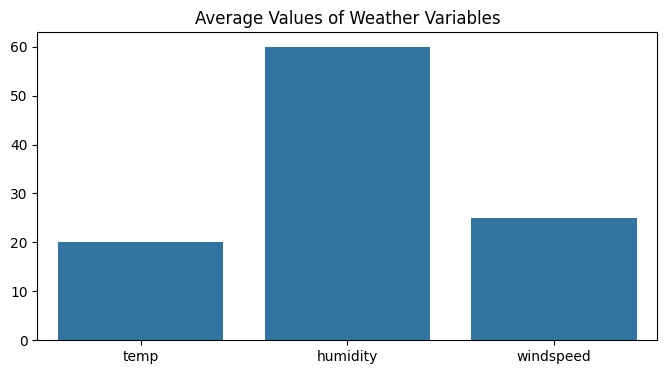

In [34]:
plt.figure(figsize=(8,4))
sns.barplot(x=["temp", "humidity", "windspeed"],
            y=[df["temp"].mean(), df["humidity"].mean(), df["windspeed"].mean()])
plt.title("Average Values of Weather Variables")
plt.show()


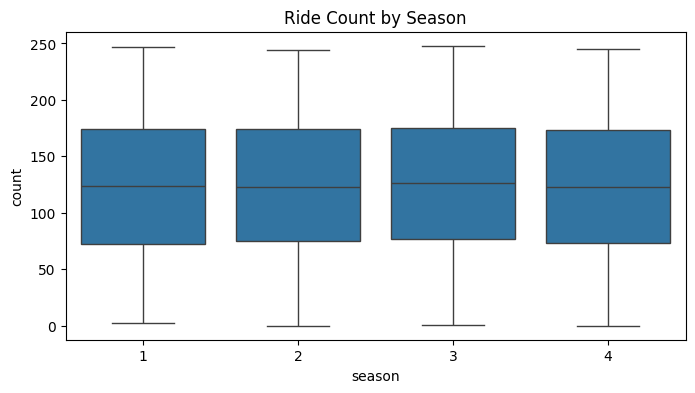

In [35]:
plt.figure(figsize=(8,4))
sns.boxplot(x="season", y="count", data=df)
plt.title("Ride Count by Season")
plt.show()


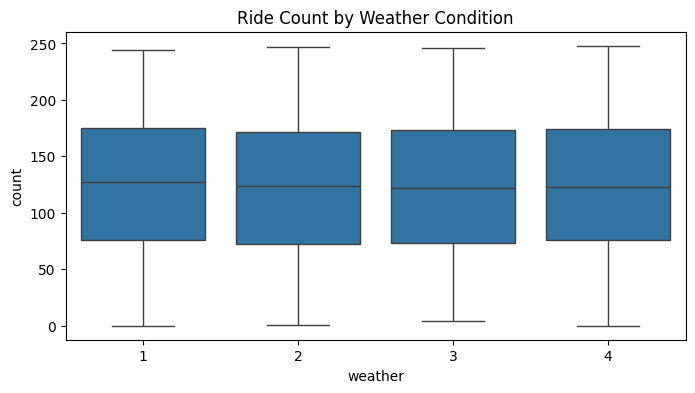

In [36]:
plt.figure(figsize=(8,4))
sns.boxplot(x="weather", y="count", data=df)
plt.title("Ride Count by Weather Condition")
plt.show()


Relationship Between Variables

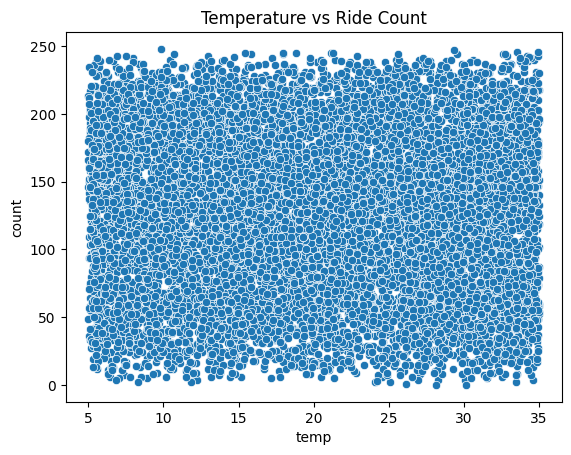

In [37]:
sns.scatterplot(x="temp", y="count", data=df)
plt.title("Temperature vs Ride Count")
plt.show()


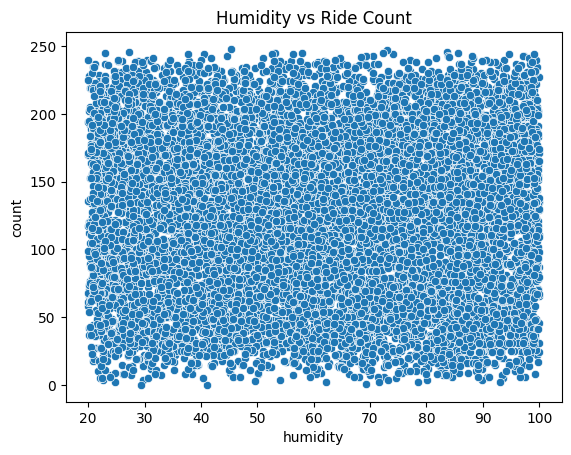

In [38]:
sns.scatterplot(x="humidity", y="count", data=df)
plt.title("Humidity vs Ride Count")
plt.show()


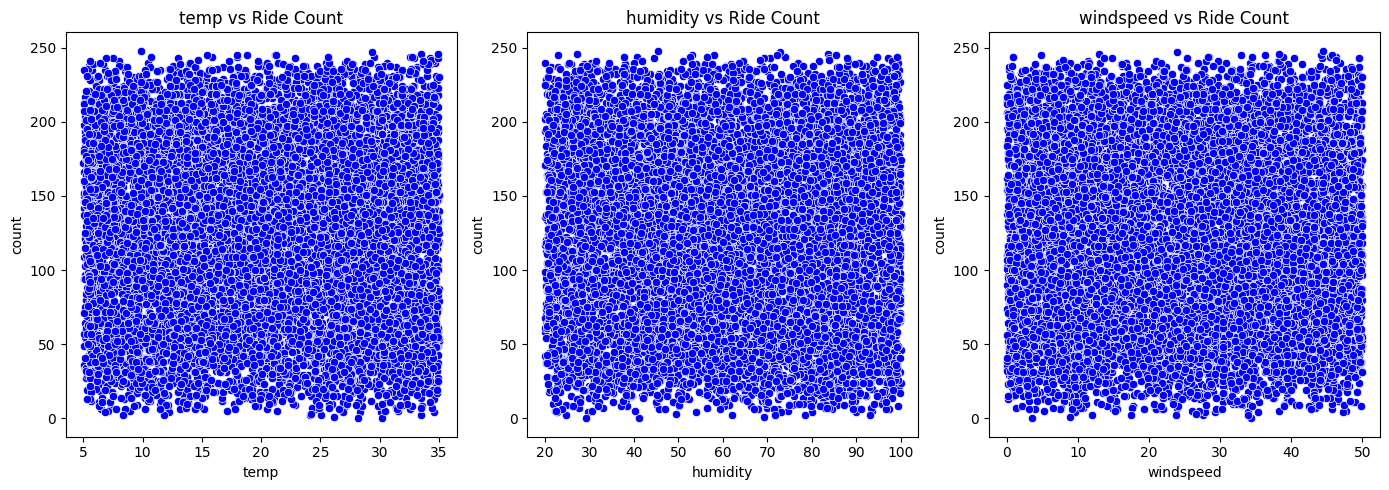

In [39]:
features = ["temp", "humidity", "windspeed"]

plt.figure(figsize=(14,5))

for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[col], y=df["count"], color="blue")
    plt.title(f"{col} vs Ride Count")

plt.tight_layout()
plt.show()

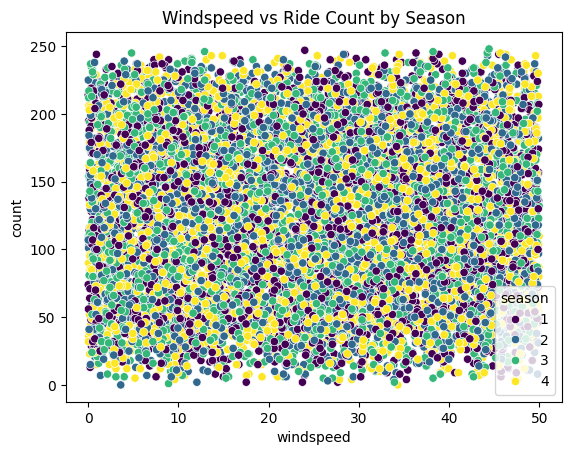

In [40]:
sns.scatterplot(x="windspeed", y="count", hue="season", palette="viridis", data=df)
plt.title("Windspeed vs Ride Count by Season")
plt.show()


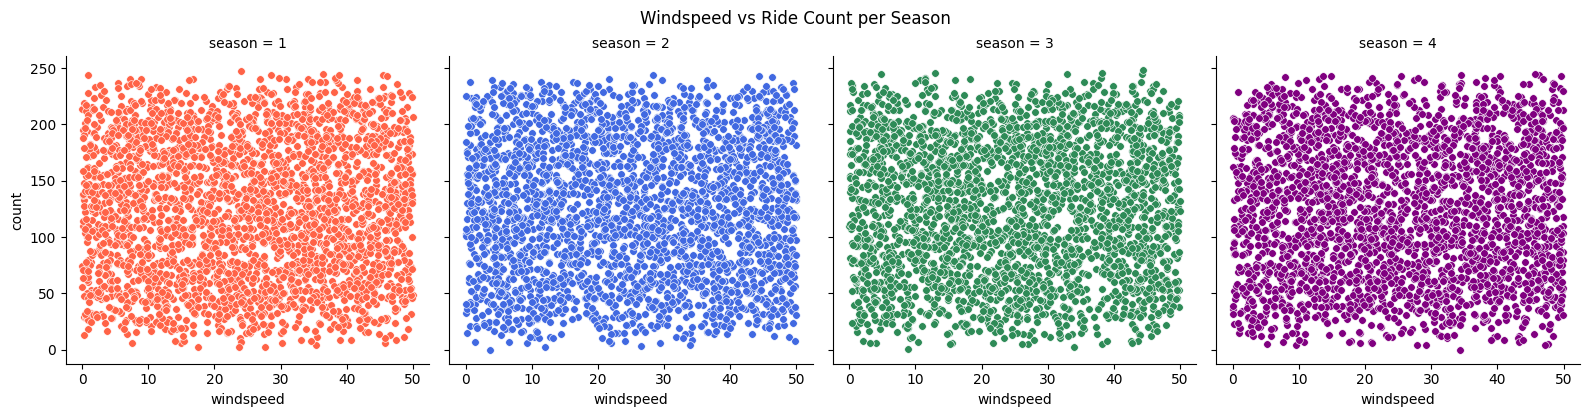

In [41]:
season_colors = {
    1: "tomato",
    2: "royalblue",
    3: "seagreen",
    4: "purple"
}

def plot_with_color(data, color):
    sns.scatterplot(
        data=data,
        x="windspeed",
        y="count",
        color=season_colors[data["season"].iloc[0]],
        s=30
    )

g = sns.FacetGrid(df, col="season", col_wrap=4, height=4)
g.map_dataframe(plot_with_color)
g.fig.suptitle("Windspeed vs Ride Count per Season", y=1.03)
plt.show()

**Boxplots for Outlier Inspection**

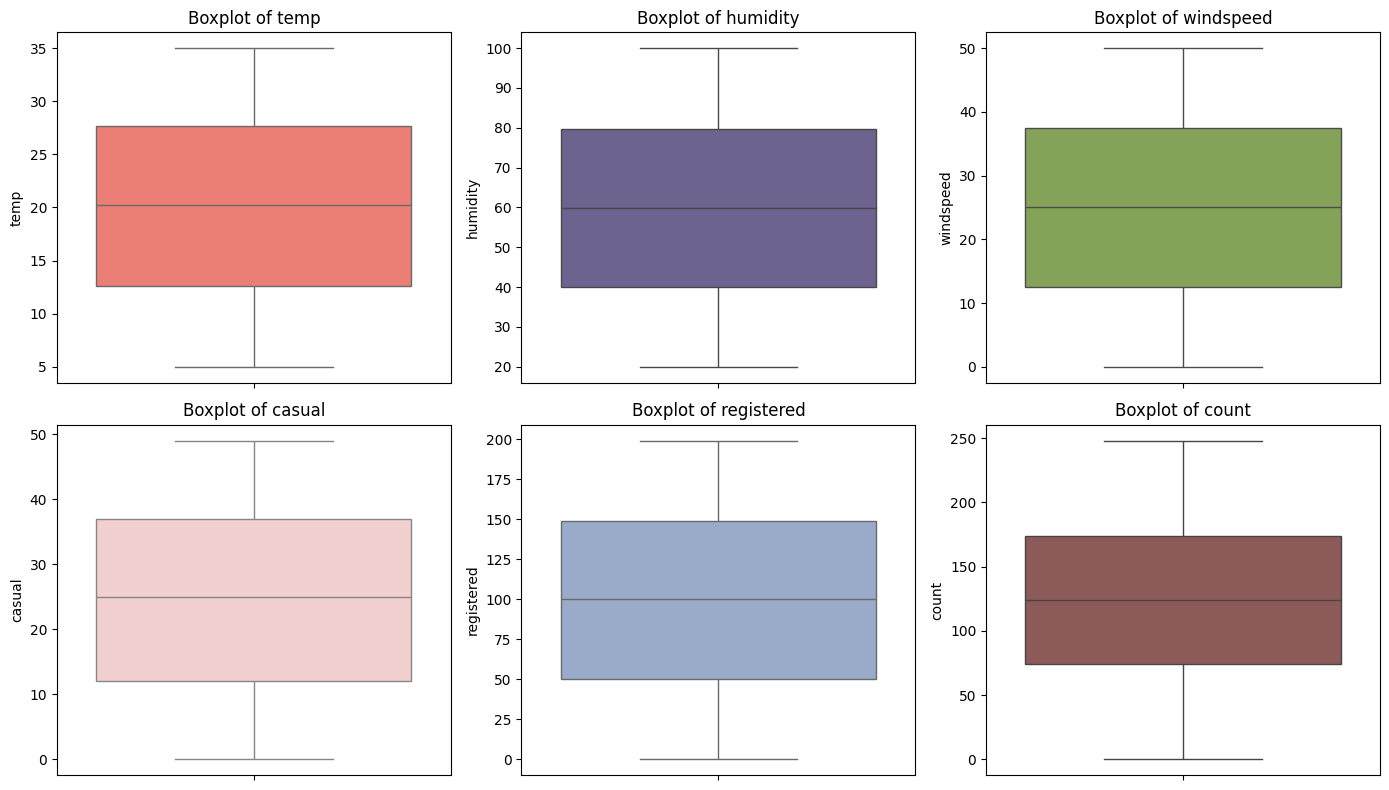

In [42]:
custom_colors = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#955251"]

plt.figure(figsize=(14,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color=custom_colors[i-1])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


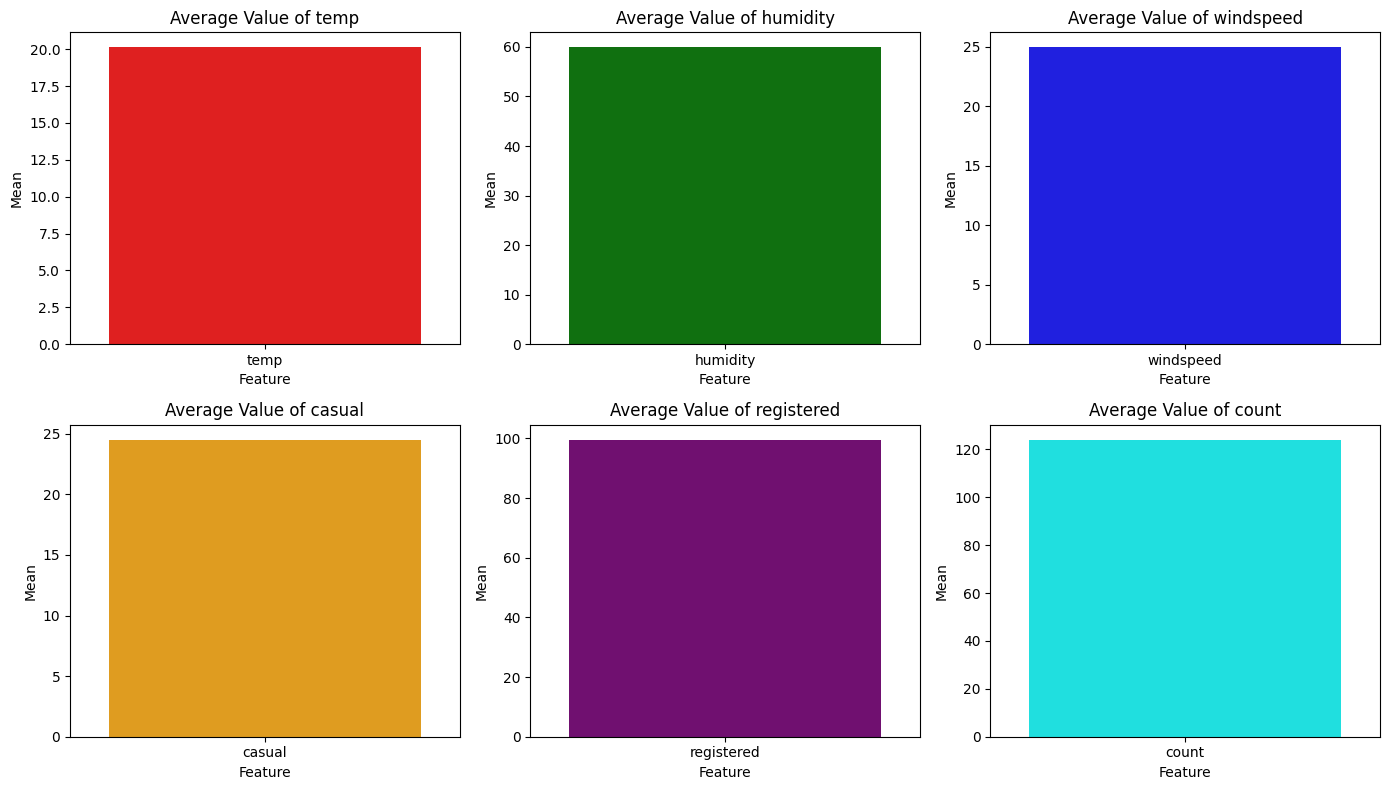

In [43]:
colors = ["red", "green", "blue", "orange", "purple", "cyan"]  # Add more if needed

plt.figure(figsize=(14,8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=[col], y=[df[col].mean()], color=colors[i-1])
    plt.title(f"Average Value of {col}")
    plt.ylabel("Mean")
    plt.xlabel("Feature")

plt.tight_layout()
plt.show()

**Prepare Data for ML**

In [44]:
df_ml = df.copy()
if "datetime" in df_ml.columns:
    df_ml = df_ml.drop(columns=["datetime"])

df_ml.head()

,season,weather,temp,humidity,windspeed,casual,registered,count,hour,day,...,is_weekend,temp_humidity,temp_windspeed,total_riders,hour_sin,hour_cos,month_sin,month_cos,weekday_sin,weekday_cos
0,3,2,6.66,76.62,9.57,5,128,133,0,1,...,1,510.2892,63.7362,133,0.000000,1.000000,0.5,0.866025,-0.974928,-0.222521
1,4,3,13.54,55.91,4.01,36,184,220,1,1,...,1,757.0214,54.2954,220,0.258819,0.965926,0.5,0.866025,-0.974928,-0.222521
2,1,3,29.58,20.97,33.61,34,97,131,2,1,...,1,620.2926,994.1838,131,0.500000,0.866025,0.5,0.866025,-0.974928,-0.222521
3,3,1,7.40,61.64,15.85,6,47,53,3,1,...,1,456.1360,117.2900,53,0.707107,0.707107,0.5,0.866025,-0.974928,-0.222521
4,3,4,30.66,98.71,11.47,14,199,213,4,1,...,1,3026.4486,351.6702,213,0.866025,0.500000,0.5,0.866025,-0.974928,-0.222521


In [45]:
X = df_ml.drop(columns=["count"])
y = df_ml["count"]

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [48]:
print("Training shape:", X_train.shape)

Training shape: (8708, 22)


In [49]:
print("Testing shape:", X_test.shape)

Testing shape: (2178, 22)


In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
print("X shape:", X.shape)

X shape: (10886, 22)


In [52]:
print("y shape:", y.shape)

y shape: (10886,)


In [53]:
print("Training set:", X_train.shape, y_train.shape)

Training set: (8708, 22) (8708,)


In [54]:
print("Testing set:", X_test.shape, y_test.shape)

Testing set: (2178, 22) (2178,)


# **Linear Regression**

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [56]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred_lr = lr.predict(X_test)


mean squared error(mse)

Root Mean Square Error(rmse)

In [58]:
r2 = r2_score(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)

In [59]:
print("Linear Regression Performance:")
print("R2 Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

Linear Regression Performance:
R2 Score: 1.0
MSE: 2.936065632675243e-24
RMSE: 1.7134951510509864e-12


In [60]:
coeff_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr.coef_
})

coeff_df.sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
15,total_riders,6.666667e-01
6,registered,3.333333e-01
5,casual,3.333333e-01
14,temp_windspeed,4.907731e-15
0,season,2.113784e-15
1,weather,1.158578e-15
2,temp,6.267918e-16
10,year,2.035788e-16
21,weekday_cos,1.052167e-16
17,hour_cos,4.503071e-17


This shows which variables increase or decrease bike demand.

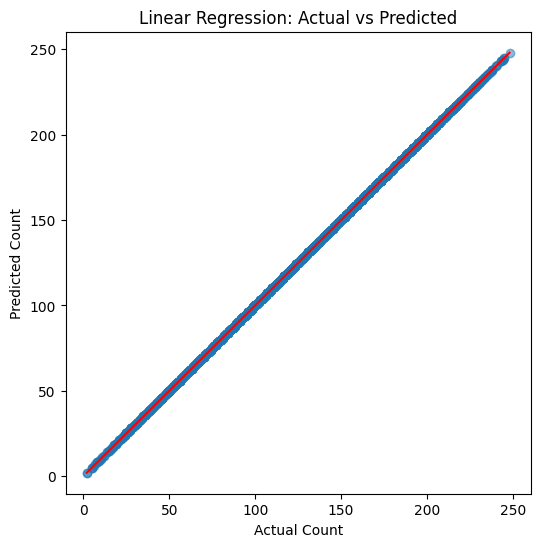

In [61]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r")
plt.show()

# **Decision Tree Regressor**

In [62]:
X_train, X_test, y_train, y_test

(      season  weather   temp  humidity  windspeed  casual  registered  hour  \
 2815       4        3  26.36     23.59       8.65      45          49     7   
 8695       2        4  19.70     28.01      39.58       0          95     7   
 8406       2        4  29.08     65.01      14.71      14         118     6   
 1543       1        1  24.38     94.31      29.86      31          91     7   
 4952       1        4  33.24     84.93      25.92      40         126     8   
 ...      ...      ...    ...       ...        ...     ...         ...   ...   
 5734       2        2  22.43     60.74       0.70      39         199    22   
 5191       4        3   7.29     52.49      29.91      48          46     7   
 5390       4        2  11.36     44.44      46.99      40          29    14   
 860        4        1   5.17     98.84      11.10      20          77    20   
 7270       2        3  26.42     54.13      22.51      34          42    22   
 
       day  month  ...  is_weekend  te

In [63]:
dt = DecisionTreeRegressor(
    max_depth=12,
    random_state=42
)

dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12, random_state=42)

In [64]:
print(dt.score(X_train,  y_train))
print(dt.score(X_test,  y_test))

1.0
0.9999986526031606


In [65]:
y_pred_dt = dt.predict(X_test)

In [66]:
r2 = r2_score(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)

In [67]:
print("Decision Tree Regressor Performance:")
print("R2 Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

Decision Tree Regressor Performance:
R2 Score: 0.9999986526031606
MSE: 0.004591368227731864
RMSE: 0.06775963568181181


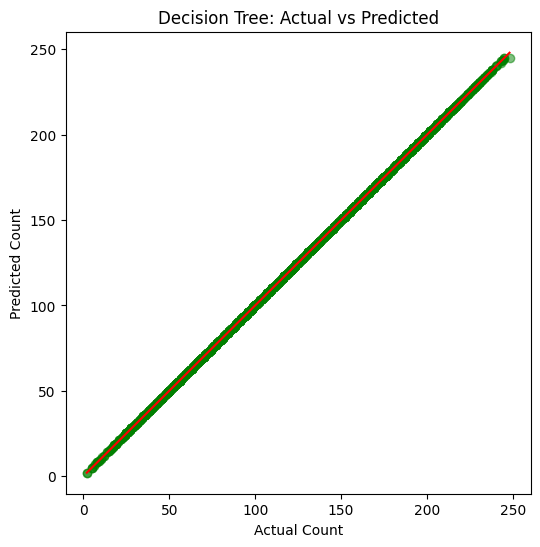

In [68]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_dt, alpha=0.5, color='green')
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Decision Tree: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r")
plt.show()

In [69]:
importance = dt.feature_importances_
features = X_train.columns

fi_df = pd.DataFrame({
    "Feature": features,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

fi_df

,Feature,Importance
15,total_riders,9.999998e-01
2,temp,1.073654e-07
8,day,4.294614e-08
10,year,2.760823e-08
20,weekday_sin,2.147307e-08
0,season,0.000000e+00
5,casual,0.000000e+00
4,windspeed,0.000000e+00
3,humidity,0.000000e+00
1,weather,0.000000e+00


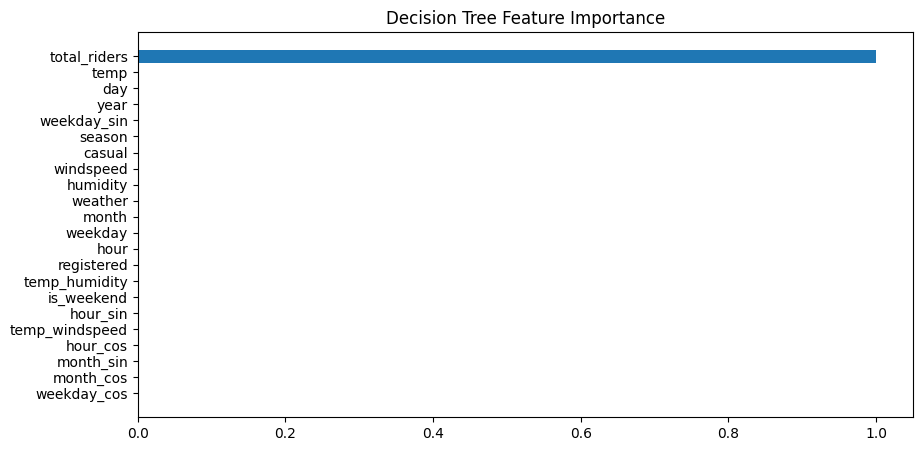

In [70]:
plt.figure(figsize=(10,5))
plt.barh(fi_df["Feature"], fi_df["Importance"])
plt.title("Decision Tree Feature Importance")
plt.gca().invert_yaxis()
plt.show()

# **Gradient Boosting Regressor**

In [71]:
X_train, X_test, y_train, y_test

(      season  weather   temp  humidity  windspeed  casual  registered  hour  \
 2815       4        3  26.36     23.59       8.65      45          49     7   
 8695       2        4  19.70     28.01      39.58       0          95     7   
 8406       2        4  29.08     65.01      14.71      14         118     6   
 1543       1        1  24.38     94.31      29.86      31          91     7   
 4952       1        4  33.24     84.93      25.92      40         126     8   
 ...      ...      ...    ...       ...        ...     ...         ...   ...   
 5734       2        2  22.43     60.74       0.70      39         199    22   
 5191       4        3   7.29     52.49      29.91      48          46     7   
 5390       4        2  11.36     44.44      46.99      40          29    14   
 860        4        1   5.17     98.84      11.10      20          77    20   
 7270       2        3  26.42     54.13      22.51      34          42    22   
 
       day  month  ...  is_weekend  te

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [73]:

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

gbr.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=200,
                          random_state=42)

In [74]:
y_pred_gbr = gbr.predict(X_test)
x_pred_gbr = gbr.predict(X_test)

In [75]:
r2 = r2_score(y_test, y_pred_gbr)
mse = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse)

In [76]:
print("Gradient Boosting Regressor Performance:")
print("R2 Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

Gradient Boosting Regressor Performance:
R2 Score: 0.9999998414246672
MSE: 0.0005403588039983072
RMSE: 0.02324561902807295


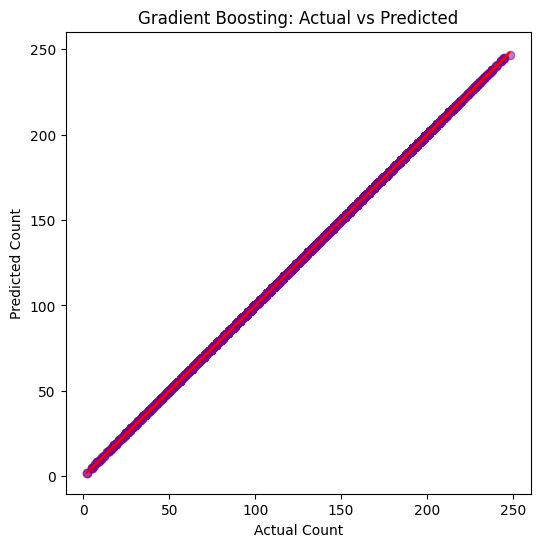

In [77]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_gbr, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.show()


In [78]:
importance = gbr.feature_importances_
features = X_train.columns

fi_df = pd.DataFrame({
    "Feature": features,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

fi_df

,Feature,Importance
15,total_riders,1.000000e+00
6,registered,1.589585e-09
2,temp,4.838005e-12
3,humidity,2.662011e-12
5,casual,3.590498e-14
0,season,0.000000e+00
4,windspeed,0.000000e+00
1,weather,0.000000e+00
8,day,0.000000e+00
7,hour,0.000000e+00


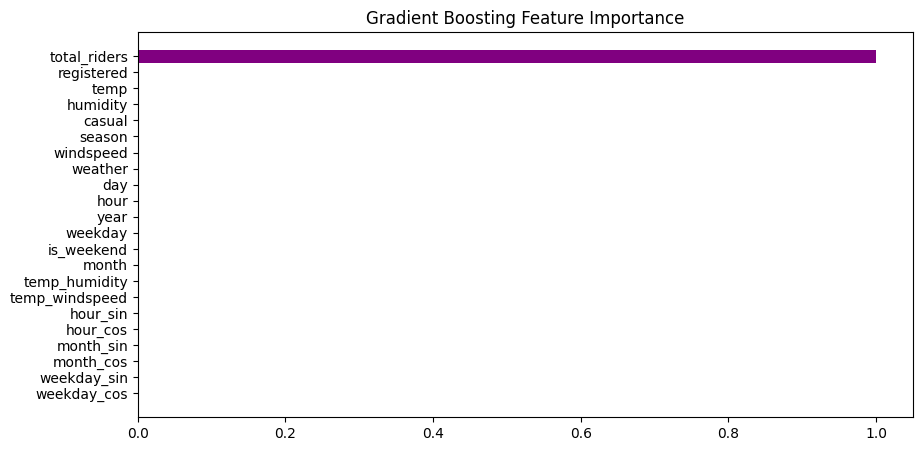

In [79]:
plt.figure(figsize=(10,5))
plt.barh(fi_df["Feature"], fi_df["Importance"], color='purple')
plt.title("Gradient Boosting Feature Importance")
plt.gca().invert_yaxis()
plt.show()


In [85]:
rf = RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=300, random_state=42)

In [86]:
# Extract importance values
importance = rf.feature_importances_
features = X_train.columns

# Create DataFrame
fi_df = pd.DataFrame({
    "Feature": features,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

fi_df

,Feature,Importance
15,total_riders,9.999994e-01
5,casual,2.317830e-07
2,temp,5.322944e-08
4,windspeed,3.160955e-08
3,humidity,3.058931e-08
7,hour,2.306896e-08
11,weekday,2.130764e-08
6,registered,2.121085e-08
17,hour_cos,1.971892e-08
14,temp_windspeed,1.961723e-08


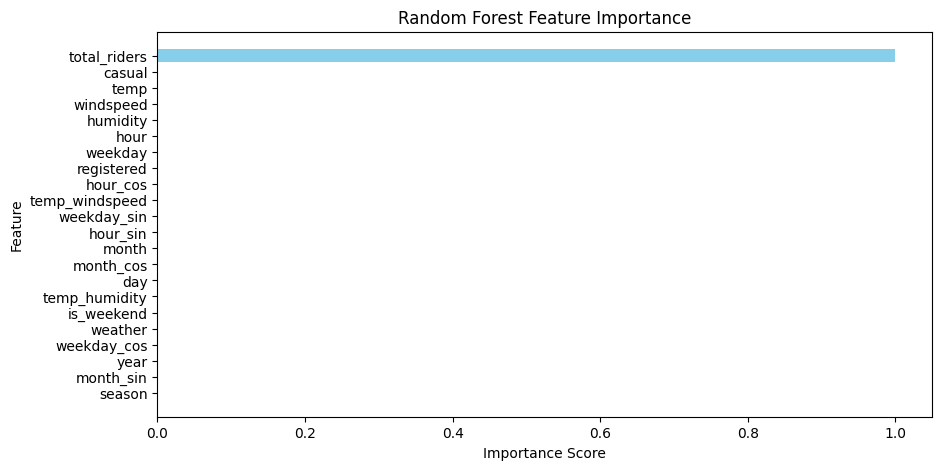

In [87]:
plt.figure(figsize=(10,5))

plt.barh(fi_df["Feature"], fi_df["Importance"], color="skyblue")
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # highest importance at top
plt.show()

In [88]:
fi_df.head(10)

,Feature,Importance
15,total_riders,9.999994e-01
5,casual,2.317830e-07
2,temp,5.322944e-08
4,windspeed,3.160955e-08
3,humidity,3.058931e-08
7,hour,2.306896e-08
11,weekday,2.130764e-08
6,registered,2.121085e-08
17,hour_cos,1.971892e-08
14,temp_windspeed,1.961723e-08


# **Compare Models**


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:

# ---- MODEL INITIALIZATION ----
lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=12, random_state=42)
rf = RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)

# ---- TRAIN MODELS ----
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gbr.fit(X_train, y_train)

# ---- PREDICTIONS ----
pred_lr = lr.predict(X_test)
pred_dt = dt.predict(X_test)
pred_rf = rf.predict(X_test)
pred_gbr = gbr.predict(X_test)


In [82]:
def evaluate_model(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse

results = {
    "Linear Regression": evaluate_model(y_test, pred_lr),
    "Decision Tree": evaluate_model(y_test, pred_dt),
    "Random Forest": evaluate_model(y_test, pred_rf),
    "Gradient Boosting": evaluate_model(y_test, pred_gbr)
}

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=["R2 Score", "MSE", "RMSE"]).T
results_df

,R2 Score,MSE,RMSE
Linear Regression,1.000000,2.936066e-24,1.713495e-12
Decision Tree,0.999999,4.591368e-03,6.775964e-02
Random Forest,0.999999,2.773452e-03,5.266357e-02
Gradient Boosting,1.000000,5.403588e-04,2.324562e-02


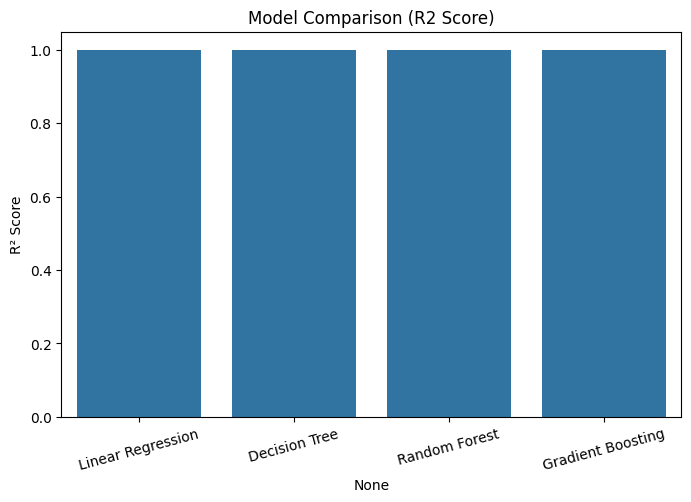

In [83]:
plt.figure(figsize=(8,5))
sns.barplot(x=results_df.index, y=results_df["R2 Score"])
plt.title("Model Comparison (R2 Score)")
plt.ylabel("R² Score")
plt.xticks(rotation=15)
plt.show()


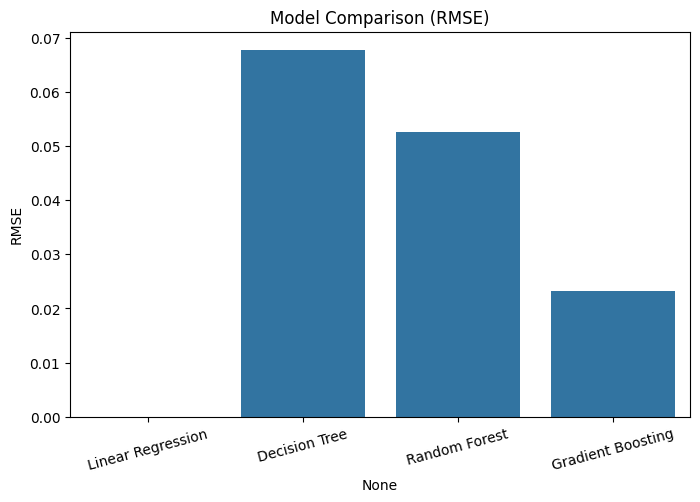

In [84]:
plt.figure(figsize=(8,5))
sns.barplot(x=results_df.index, y=results_df["RMSE"])
plt.title("Model Comparison (RMSE)")
plt.ylabel("RMSE")
plt.xticks(rotation=15)
plt.show()


In [100]:
X_train[:6]

,season,weather,temp,humidity,windspeed,casual,registered,hour,day,month,...,is_weekend,temp_humidity,temp_windspeed,total_riders,hour_sin,hour_cos,month_sin,month_cos,weekday_sin,weekday_cos
2815,4,3,26.36,23.59,8.65,45,49,7,28,4,...,0,621.8324,228.0140,94,0.965926,-2.588190e-01,8.660254e-01,-5.000000e-01,0.433884,-0.900969
8695,2,4,19.70,28.01,39.58,0,95,7,29,12,...,0,551.7970,779.7260,95,0.965926,-2.588190e-01,-2.449294e-16,1.000000e+00,0.433884,-0.900969
8406,2,4,29.08,65.01,14.71,14,118,6,17,12,...,1,1890.4908,427.7668,132,1.000000,6.123234e-17,-2.449294e-16,1.000000e+00,-0.974928,-0.222521
1543,1,1,24.38,94.31,29.86,31,91,7,6,3,...,1,2299.2778,727.9868,122,0.965926,-2.588190e-01,1.000000e+00,6.123234e-17,-0.781831,0.623490
4952,1,4,33.24,84.93,25.92,40,126,8,26,7,...,0,2823.0732,861.5808,166,0.866025,-5.000000e-01,-5.000000e-01,-8.660254e-01,0.781831,0.623490
6181,3,1,33.73,36.65,34.44,2,141,13,15,9,...,0,1236.2045,1161.6612,143,-0.258819,-9.659258e-01,-1.000000e+00,-1.836970e-16,0.433884,-0.900969


In [99]:
y_train[:6]

,count
2815,94
8695,95
8406,132
1543,122
4952,166
6181,143


In [103]:
N = 5
X_sample = X_train.iloc[:N]
y_pred_sample = gbr.predict(X_sample)

print("Predicted output:")
print(y_pred_sample)

Predicted output:
[ 94.01298411  95.00088634 131.99989872 122.00052781 165.99848343]


In [106]:
import joblib
joblib.dump(gbr, "gbr_model.pkl")


['gbr_model.pkl']